# Binary Classification on Text Data

## (a) Download the data.

(1) There are 7613 data points in the training dataset and 3263 in the testing dataset.

(2) 42.97% of the training tweets are of real disasters and 57.03% of them are not.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/qiuyiliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/qiuyiliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/qiuyiliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qiuyiliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
train = pd.read_csv("/Users/qiuyiliu/Desktop/Cornell Tech/Applied Machine Learning/HW2/train.csv")
test = pd.read_csv("/Users/qiuyiliu/Desktop/Cornell Tech/Applied Machine Learning/HW2/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
train_real = sum(train.target)/len(train.target)
train_not = 1 - train_real
print(train_real, train_not)

0.4296597924602653 0.5703402075397347


## (b) Split the training data.

In [8]:
train, dev = train_test_split(train,train_size = 0.7,random_state = 123)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 1504 to 3582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5329 non-null   int64 
 1   keyword   5290 non-null   object
 2   location  3583 non-null   object
 3   text      5329 non-null   object
 4   target    5329 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 249.8+ KB


In [10]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 1971 to 4802
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2284 non-null   int64 
 1   keyword   2262 non-null   object
 2   location  1497 non-null   object
 3   text      2284 non-null   object
 4   target    2284 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 107.1+ KB


## (c) Preprocess the Data.

- Expand Contractions. (ref: https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert)

In [11]:
def expand(tweet):
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"don't", "do not", tweet)  
    return tweet
train['text_ex'] = train['text'].apply(expand)
train['text_ex'].head()

1504    'Invading Iraq was a catastrophic mistake'.\n\...
6984    Crazy Mom Threw Teen Daughter a NUDE Twister S...
2998    Kids Disappear in Dust Storm in Atmospheric Au...
3181    NHS England announces new plan to meet emergen...
2381    Lake Dallas crash causes train to derail http:...
Name: text_ex, dtype: object

In [12]:
dev['text_ex'] = dev['text'].apply(expand)
dev['text_ex'].head()

1971    1970 Mercury Cyclone GT Hood Moulding Very NIC...
2502    The Desolate Hope: Part 2: MIRAD: http://t.co/...
5371    we was all just laughing and talking junk now ...
6258                                      FINALLY a storm
549     Dragon Ball Z: Battle Of Gods (2014) - Rotten ...
Name: text_ex, dtype: object

- Convert all the words to lowercase

In [13]:
train['text_lower'] = train['text_ex'].str.lower()
dev['text_lower'] = dev['text_ex'].str.lower()
train.head()

,id,keyword,location,text,target,text_ex,text_lower
1504,2172,catastrophic,"Buxton, Venice, and Nottingham",'Invading Iraq was a catastrophic mistake'.\n\...,1,'Invading Iraq was a catastrophic mistake'.\n\...,'invading iraq was a catastrophic mistake'.\n\...
6984,10016,twister,Detroit,Crazy Mom Threw Teen Daughter a NUDE Twister S...,0,Crazy Mom Threw Teen Daughter a NUDE Twister S...,crazy mom threw teen daughter a nude twister s...
2998,4306,dust%20storm,NaN,Kids Disappear in Dust Storm in Atmospheric Au...,1,Kids Disappear in Dust Storm in Atmospheric Au...,kids disappear in dust storm in atmospheric au...
3181,4567,emergency%20plan,Surrey & Manchester,NHS England announces new plan to meet emergen...,0,NHS England announces new plan to meet emergen...,nhs england announces new plan to meet emergen...
2381,3423,derail,USA,Lake Dallas crash causes train to derail http:...,1,Lake Dallas crash causes train to derail http:...,lake dallas crash causes train to derail http:...


- Strip Punctuations and Stop words.

In [14]:
def cleaning(text):
    #remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    #remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove multiple spaces
    text = re.sub(r"\s+", " ", text)
    # remove stopwords
    text_token = nltk.word_tokenize(text)
    words = [w for w in text_token if w not in stopwords.words('english')]
    return ' '.join(words)

train['text_cleaned'] = train['text_lower'].apply(cleaning)
train['text_cleaned'].head()

1504    invading iraq catastrophic mistake diplomacy n...
6984    crazy mom threw teen daughter nude twister sex...
2998    kids disappear dust storm atmospheric aussie t...
3181    nhs england announces new plan meet emergency ...
2381                lake dallas crash causes train derail
Name: text_cleaned, dtype: object

In [23]:
dev['text_cleaned'] = dev['text_lower'].apply(cleaning)
dev['text_cleaned'].head()

,id,keyword,location,text,target,text_ex,text_lower,text_cleaned,text_fv
1971,2836,cyclone,NaN,1970 Mercury Cyclone GT Hood Moulding Very NIC...,0,1970 Mercury Cyclone GT Hood Moulding Very NIC...,1970 mercury cyclone gt hood moulding very nic...,1970 mercury cyclone gt hood moulding nice cor...,1970 mercury cyclone hood mould nice core cobr...
2502,3593,desolate,NaN,The Desolate Hope: Part 2: MIRAD: http://t.co/...,0,The Desolate Hope: Part 2: MIRAD: http://t.co/...,the desolate hope: part 2: mirad: http://t.co/...,desolate hope part 2 mirad via youtube,desolate hope part mirad via youtube
5371,7663,panic,NaN,we was all just laughing and talking junk now ...,0,we was all just laughing and talking junk now ...,we was all just laughing and talking junk now ...,laughing talking junk everyone panic mode,laugh talk junk everyone panic mode
6258,8942,storm,NaN,FINALLY a storm,0,FINALLY a storm,finally a storm,finally storm,finally storm
549,798,battle,NaN,Dragon Ball Z: Battle Of Gods (2014) - Rotten ...,0,Dragon Ball Z: Battle Of Gods (2014) - Rotten ...,dragon ball z: battle of gods (2014) - rotten ...,dragon ball z battle gods 2014 rotten tomatoes...,dragon ball battle god 2014 rotten tomato via ...


- Lemmatize all the words (i.e., convert every word to its root so that all of “running,” “run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best” are converted to “good”; this is easily done using nltk.stem). ref: https://medium.com/@gaurav5430/using-nltk-for-lemmatizing-sentences-c1bfff963258

In [16]:
lemmatizer = WordNetLemmatizer() 
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            if len(word) > 2:
                lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemma = lemmatizer.lemmatize(word, tag)
            if len(lemma) > 2:
                lemmatized_sentence.append(lemma)
    return " ".join(lemmatized_sentence)

In [17]:
train['text_fv'] = train['text_cleaned'].apply(lemmatize_sentence)
train['text_fv'].head()

1504    invade iraq catastrophic mistake diplomacy nee...
6984    crazy mom throw teen daughter nude twister sex...
2998    kid disappear dust storm atmospheric aussie th...
3181    nhs england announces new plan meet emergency ...
2381                 lake dallas crash cause train derail
Name: text_fv, dtype: object

In [18]:
dev['text_fv'] = dev['text_cleaned'].apply(lemmatize_sentence)
dev['text_fv'].head()

1971    1970 mercury cyclone hood mould nice core cobr...
2502                 desolate hope part mirad via youtube
5371                  laugh talk junk everyone panic mode
6258                                        finally storm
549     dragon ball battle god 2014 rotten tomato via ...
Name: text_fv, dtype: object

## (d) Bag of Words model.

In [19]:
def bw(data):
    count_vect = CountVectorizer(binary=True, min_df=0.05)
    x_train = count_vect.fit_transform(data)
    return x_train, count_vect

In [20]:
list_corpus = train['text_fv'].tolist()
list_labels = train['target'].tolist()
x_train_counts, count_vect = bw(list_corpus)
x_train_counts.toarray().sum()

294

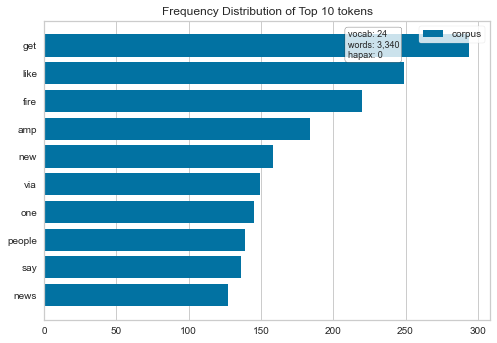

In [21]:
# from yellowbrick.classifier import ClassificationReport
# from yellowbrick.classifier import ROCAUC
# from yellowbrick.classifier import PrecisionRecallCurve
# from yellowbrick.model_selection import FeatureImportances
# from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.text import FreqDistVisualizer
# from yellowbrick.text import TSNEVisualizer
# from yellowbrick.contrib.classifier import DecisionViz
# from yellowbrick.classifier import DiscriminationThreshold
count_vect=CountVectorizer(binary=True, min_df = 100)
X_train=count_vect.fit_transform(list_corpus)
features = count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(X_train)
visualizer.show()

In [22]:
corpus = ['one two three everywhere', 'four five six everywhere', 'seven eight nine everywhere']
count_vect = CountVectorizer(binary=True, min_df=0.01)
# below we call fit_transform on the corpus and get the feature names.
X = count_vect.fit_transform(corpus)
vocab = count_vect.get_feature_names()
print(vocab)
print(X.toarray())


['eight', 'everywhere', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three', 'two']
[[0 1 0 0 0 1 0 0 1 1]
 [0 1 1 1 0 0 0 1 0 0]
 [1 1 0 0 1 0 1 0 0 0]]


# Writeup

## 1a.

In [85]:
df = pd.DataFrame({'x1': [3,2,4,1,2,4,4], 'x2': [4,2,4,4,1,3,1], 'y': [0,0,0,0,1,1,1] })  
X, y = df[['x1','x2']].to_numpy(), df.y.to_numpy()
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

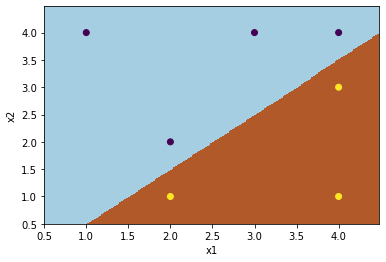

In [86]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

model = SVC(kernel='linear', C=10000)
model.fit(X, y)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) 
p1 = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 1b.

In [90]:
model.coef_

array([[ 1.9998464, -1.9996928]])

$$ y = -1.9996928 + 1.9998464*x$$ 

## 1c.

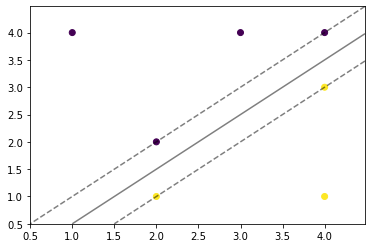

In [39]:
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).## 1b.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
p1 = plt.scatter(X[:, 0], X[:, 1], c=y)


## 1d.

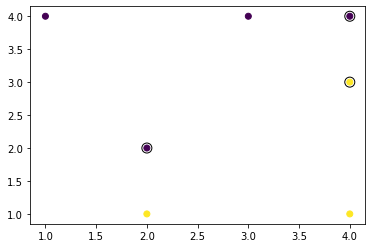

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


## 1e.

At optimal, the parameters of the decision boundary is a linear combination of only the support vectors. Since the 7th point is not a support vector, the decision boundary will not change if it only changes a little.

## 1f.

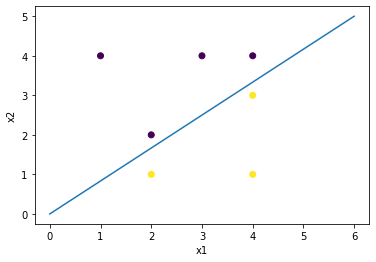

In [64]:
point1 = [0, 0]
point2 = [6, 5]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)

p1 = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

$$ y = 5/6* x$$

## 1g.

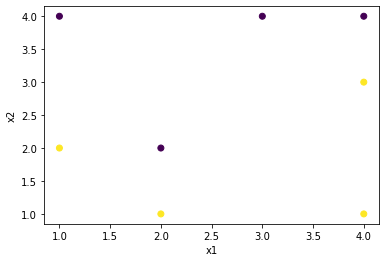

In [81]:
X_new = np.append(X,[[1,2]],axis=0)
y_new = np.append(y,[1])
p1 = plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()